# Problemas de optimización


In [1]:
import sympy as sp
import matplotlib.pyplot as plt
x=sp.symbols('x')
def draw_rectangle(P1,P2,P3,P4,color='black',linestyle='-'):
    p1, p2 = sp.Point(P1[0], P1[1]), sp.Point(P2[0], P2[1])
    p3, p4 = sp.Point(P3[0], P3[1]), sp.Point(P4[0], P4[1])
    plt.plot(*zip(p1,p2),color=color,linestyle=linestyle)
    plt.plot(*zip(p2,p3),color=color,linestyle=linestyle)
    plt.plot(*zip(p3,p4),color=color,linestyle=linestyle)
    plt.plot(*zip(p4,p1),color=color,linestyle=linestyle)
    #or alternatively
    #plt.plot(*zip(p1, p2, p3, p4, p1))

## Problema 51

Considere el siguiente problema: Se ha de construir una caja con la parte
superior abierta, a partir de una pieza cuadrada de cartón de 3 dm de ancho, al
recortar un cuadrado de cada una de las cuatro esquinas y doblar los lados hacia
arriba. Encuentre el volumen más grande que puede tener una caja semejante.

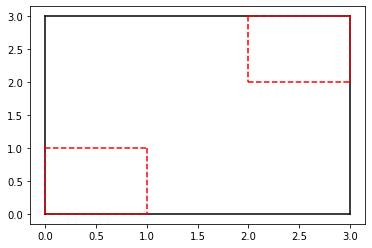

In [2]:
P1=[0,0]
P2=[0,3]
P3=[3,3]
P4=[3,0]

draw_rectangle(P1,P2,P3,P4)

P1=[0,0]
P2=[0,1]
P3=[1,1]
P4=[1,0]

draw_rectangle(P1,P2,P3,P4,color='red',linestyle='--')

P1=[2,2]
P2=[3,2]
P3=[3,3]
P4=[2,3]

draw_rectangle(P1,P2,P3,P4,color='red',linestyle='--')

La función que queremos optimizar es $V(x)=x\cdot (3-2x)^2$ y los valores que puede tomar la variable $x$ (la _decisión_ a tomar) son $x\in [0,\frac{3}{2}]$.

Tenemos que encontrar el máximo absoluto de una función continua en un intervalo cerrado y acotado. Por el teorema de Weierstrass, sabemos que la función __alcanza__ dicho máximo y estará, o bien en los puntos críticos, o en los extremos del intervalo.

Paso 1: hallar los puntos críticos. La función es un polinomio y está definida en $\mathbb{R}$, por tanto los puntos críticos serán solamente los puntos donde la primera derivada se anule.

In [3]:
funcion = x*(3-2*x)**2
derivada = sp.diff(funcion,x)
ecuacion = sp.Eq(derivada,0)
puntosCriticos = sp.solveset(ecuacion,x)
puntosCriticos

{1/2, 3/2}

Obtenemos dos puntos críticos, que, junto a los extremos del intervalo, forman nuestra lista de candidatos:
* $c_1=0$
* $c_2=1/2$
* $c_3=3/2$

Ahora solamente debemos comparar el valor de la función en los candidatos $c_i$, $i=1,2,3$:

In [4]:
c1 = 0
c2 = sp.Rational(1/2)
c3 = 3/2
funcion.subs(x,c1),funcion.subs(x,c2),funcion.subs(x,c3)

(0, 2, 0)

Observamos que el máximo absoluto se obtiene en $c_2=1/2$. El máximo absoluto de la función $V(x)$ en $[0,3/2]$ se encuentra en dicho punto.

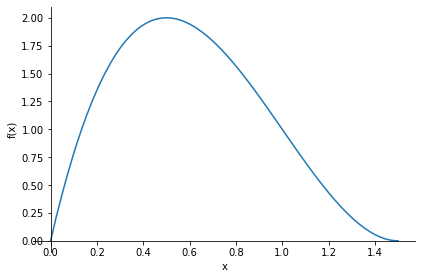

In [5]:
sp.plot(funcion,(x,0,3/2))

Es importante notar que, en la resolución de este ejercicio, __no hemos usado la derivada segunda__, ya que teníamos que buscar un extremo absoluto de una función continua en un intervalo cerrado y acotado.

## Problema 52

Un recipiente rectangular con la parte superior abierta ha de tener un volumen
de 10 m3. La longitud de su base es el doble de su ancho. El material para la base
cuesta 10€ por metro cuadrado; el de los costados, cuesta 6€ por metro
cuadrado. Encuentre el costo de los materiales para tener el más barato de esos
recipientes.

__Solución:__ si $x$ es el ancho de la base, entonces el largo es $2x$ y la altura es $h$. El volumen es $V=10=2x^2h$.

In [6]:
h=sp.symbols('h')
ecuacionVolumen = sp.Eq(2*x**2*h,10)
ecuacionVolumen

Eq(2*h*x**2, 10)

El coste es igual al coste de los laterales más el coste de la base

$$
Coste_{base} = Precio_{base}\cdot Superficie_{base} = 10\cdot 2x^2=20x^2
$$

$$
Coste_{lateral} = Precio_{lateral}\cdot Superficie_{lateral} = 6\cdot\left( 2x^2+4xh\right)
$$

In [7]:
Coste = 20*x**2+6*(2*x*h+2*2*x*h)
Coste

36*h*x + 20*x**2

Tenemos una función de coste que depende de dos variables, $x$ y $h$. Podemos hallar una en función de otra a partir de la ecuación del volumen. Despejamos la $h$ (el ejercicio es totalmente análogo si se despeja la $x$).

In [8]:
h_funcionde_x = sp.solveset(ecuacionVolumen,h)
h_funcionde_x

{5/x**2}

Usamos dicho valor en la función de coste:

In [9]:
h_funcionde_x_subs = list(h_funcionde_x)[0]
Coste_x = Coste.subs(h,h_funcionde_x_subs)
Coste_x

20*x**2 + 180/x

Queda por ver qué valores de $x$ son _posibles_. Es claro que no es posible usar el valor $x=0$ (el volumen sería 0, cuando tiene que ser 10). Por tanto los valores posibles son $x\in(0,\infty)$, que es un abierto no acotado.

No es posible aplicar el Teorema de Weierstrass para la búsqueda de máximos y mínimos.

Empezamos buscando los puntos críticos, que son donde
* $C'(x)=0$
* $\nexists C'(x)$

La función $C'(x)$ es:

In [10]:
derivadaPrimera = sp.diff(Coste_x,x)
derivadaPrimera

40*x - 180/x**2

Es claro que no existe cuando $x=0$, pero hemos excluído ese punto del intervalo de posibles decisiones.

Los puntos donde la derivada se anula son:

In [11]:
ecuacionPuntosCriticos = sp.Eq(derivadaPrimera,0)
sp.solveset(ecuacionPuntosCriticos,x)

{6**(2/3)/2, -6**(2/3)/4 - 3*2**(2/3)*3**(1/6)*I/4, -6**(2/3)/4 + 3*2**(2/3)*3**(1/6)*I/4}

Obtenemos tres puntos, de los cuales únicamente el primero es real. Pedimos a `sympy` que nos devuelva únicamente soluciones reales.

In [12]:
sp.solveset(ecuacionPuntosCriticos,x,sp.S.Reals)

{6**(2/3)/2}

In [13]:
puntoCritico = list(sp.solveset(ecuacionPuntosCriticos,x,sp.S.Reals))[0]
puntoCritico

6**(2/3)/2

In [14]:
Coste_x.subs(x,puntoCritico)

90*6**(1/3)

En este momento sabemos que la función, en el punto $P=(\frac{6^{\frac{2}{3}}}{2},90\sqrt[3]{6})$ tiene tangente horizontal (segmento rojo) en el punto crítico. Es posible que sea un máximo relativo (local) (morado), un mínimo relativo (amarillo) o un punto de silla (verde).

```{figure} ./imgs/optimizacionPuntoCritico1.png
:alt: fishy
:class: bg-primary mb-1
:width: 600px
:align: center
```

La derivada segunda evaluada __en el punto__ $x_{critico}= \frac{6^{\frac{2}{3}}}{2}$ nos sirve para averiguar en qué caso estamos.

In [16]:
derivadaSegunda = sp.diff(derivadaPrimera,x)
derivadaSegunda

40 + 360/x**3

In [17]:
derivadaSegunda.subs(x,puntoCritico)

120

Obtenemos que $C''(x_{critico})>0$, por tanto el punto crítico es un mínimo __relativo__ (o local). No obstante, esto no nos asegura que éste es el punto que buscamos.

Para asegurarnos que el punto $P$ es el punto buscado, es decir, el mínimo coste para __cualquier valor__ de $x$ (la _decisión_) posible debemos trabajar un poco más. Debemos asegurarnos que $C(x_{critico})<C(x)$ para cualquier otro valor de $x$ posible, que son los $x>0$.

Vemos que $C''(x)>0$ para $x>0$. Entonces $C'(x)$ es una función creciente. Como $C'(x_{critico})=0$ entonces sucede que:

* Si $x\in(0,x_{critico})$ entonces $C'(x)<0$, por lo tanto $C(x)$ decrece.
* Si $x\in(x_{critico},\infty)$ entonces $C'(x)>0$, por lo tanto $C(x)$ crece.

De este modo queda probado que el valor de $C(x)$ en el punto $x_{critico}$ es el menor de todos los valores que toma la función cuando $x>0$.